In [3]:
from IPython.display import display, Image
import os, warnings
import re

warnings.filterwarnings(action='ignore')

In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

In [72]:
driver = webdriver.Chrome('./chromedriver_90')

url = 'https://coronaboard.kr/'
driver.get(url)

time.sleep(3)

In [75]:
from selenium.webdriver import ActionChains

some_tag = driver.find_element_by_id('show-more')
# ActionChains(driver).move_to_element(some_tag).perform()

time.sleep(2)
some_tag.click()


### 확진자 정보
```
//*[@id="country-table"]/div/div/table/tbody/tr[1]/td[3]
//*[@id="country-table"]/div/div/table/tbody/tr[2]/td[3]
..
//*[@id="country-table"]/div/div/table/tbody/tr[5]/td[3]
```

### 사망자 정보
```
//*[@id="country-table"]/div/div/table/tbody/tr[1]/td[4]
//*[@id="country-table"]/div/div/table/tbody/tr[3]/td[4]
..
```

In [77]:
all_data = []

for i in range(2, 11):
    tmp = '//*[@id="country-table"]/div/div/table/tbody/tr/td[{}]'.format(i)
    # print(tmp)
    sel_ele = driver.find_elements_by_xpath(tmp)
    column_data = []
    
    for one in sel_ele:
        # print(one.text)
        column_data.append(one.text)
        
    print(len(sel_ele))
    all_data.append(column_data)
    print(column_data)
    print()

221
['중국🇨🇳', '인도🇮🇳', '미국🇺🇸', '인도네시아🇮🇩', '파키스탄🇵🇰', '브라질🇧🇷', '나이지리아🇳🇬', '방글라데시🇧🇩', '러시아🇷🇺', '멕시코🇲🇽', '일본🇯🇵*', '에티오피아🇪🇹', '필리핀🇵🇭', '이집트🇪🇬', '베트남🇻🇳', '콩고민주공화국🇨🇩', '터키🇹🇷', '이란🇮🇷', '독일🇩🇪', '태국🇹🇭', '영국🇬🇧', '프랑스🇫🇷', '이탈리아🇮🇹', '탄자니아🇹🇿', '남아프리카 공화국🇿🇦', '미얀마🇲🇲', '케냐🇰🇪', '대한민국🇰🇷', '콜롬비아🇨🇴', '스페인🇪🇸', '우간다🇺🇬', '아르헨티나🇦🇷', '알제리🇩🇿', '수단🇸🇩', '우크라이나🇺🇦', '이라크🇮🇶', '아프가니스탄🇦🇫', '폴란드🇵🇱', '캐나다🇨🇦', '모로코🇲🇦', '사우디아라비아🇸🇦', '우즈베키스탄🇺🇿', '페루🇵🇪', '앙골라🇦🇴', '말레이시아🇲🇾', '모잠비크🇲🇿', '가나🇬🇭', '예멘🇾🇪', '네팔🇳🇵', '베네수엘라🇻🇪', '마다가스카르🇲🇬', '카메룬🇨🇲', '코트디부아르🇨🇮', '호주🇦🇺', '니제르🇳🇪', '대만🇹🇼', '스리랑카🇱🇰', '부르키나파소🇧🇫', '말리🇲🇱', '루마니아🇷🇴', '말라위🇲🇼', '칠레🇨🇱', '카자흐스탄🇰🇿', '잠비아🇿🇲', '과테말라🇬🇹', '에콰도르🇪🇨', '시리아🇸🇾', '네덜란드🇳🇱', '세네갈🇸🇳', '캄보디아🇰🇭', '차드🇹🇩', '소말리아🇸🇴', '짐바브웨🇿🇼', '기니🇬🇳', '르완다🇷🇼', '베냉🇧🇯', '부룬디🇧🇮', '튀니지🇹🇳', '볼리비아🇧🇴', '벨기에🇧🇪', '아이티🇭🇹', '쿠바🇨🇺', '남수단🇸🇸', '도미니카 공화국🇩🇴', '체코🇨🇿', '그리스🇬🇷', '요르단🇯🇴', '포르투갈🇵🇹', '아제르바이잔🇦🇿', '스웨덴🇸🇪', '온두라스🇭🇳', '아랍에미레이트🇦🇪', '헝가리🇭🇺', '타지키스탄🇹🇯', '벨라루스🇧🇾', '오스트리아🇦🇹', '파푸아뉴기니🇵🇬', '세르비아🇷🇸', '이스라엘🇮🇱', '스위스🇨🇭', '토고🇹🇬', '시에라리온🇸🇱', '홍콩🇭🇰', '라오스🇱

221
['4,636', '389,302\n(+474)', '617,463\n(+297)', '54,956', '22,034\n(+27)', '502,817\n(+899)', '2,118\n(+1)', '13,626', '129,801', '231,244\n(+57)', '14,439', '4,286\n(+3)', '23,749', '15,898\n(+39)', '69\n(+2)', '879', '49,236\n(+51)', '83,101', '91,007\n(+37)', '1,693\n(+35)', '127,981\n(+5)', '110,778\n(+40)', '127,291\n(+21)', '21', '58,795\n(+93)', '3,265\n(+3)', '3,461\n(+5)', '2,006\n(+2)', '100,582\n(+648)', '80,689\n(+37)', '680\n(+20)', '89,490\n(+447)', '3,641\n(+10)', '2,737', '52,032', '16,910', '4,293', '74,829', '26,084\n(+8)', '9,244\n(+6)', '7,691', '718', '190,645\n(+220)', '868\n(+9)', '4,477', '848', '794\n(+1)', '1,355', '8,772', '2,973\n(+15)', '903', '1,313', '308', '910', '193', '569', '2,633\n(+52)', '167', '524', '32,391', '1,171\n(+3)', '31,645\n(+132)', '4,249\n(+7)', '1,691', '8,735\n(+41)', '21,304\n(+11)', '1,848\n(+3)', '17,727', '1,158', '441', '174', '775', '1,685\n(+13)', '168', '388\n(+6)', '103', '8', '14,118\n(+80)', '16,174\n(+42)', '25,141\n(+

221
['64', '21,723', '103,987', '7,328', '4,300', '84,540', '812', '5,200', '36,552', '19,224', '6,214', '2,395', '12,450', '2,715', '139', '423', '63,738', '36,975', '44,526', '3,229', '68,357', '88,210', '70,350', '9', '30,897', '2,731', '3,334', '2,963', '77,991', '80,519', '1,589', '94,641', '3,108', '829', '50,987', '32,139', '2,717', '76,066', '37,348', '14,271', '13,656', '3,181', '61,586', '1,149', '21,659', '2,322', '3,059', '231', '21,370', '9,215', '1,522', '3,026', '1,821', '1,191', '226', '591', '11,293', '644', '710', '56,154', '1,825', '79,630', '21,863', '7,106', '15,677', '25,315', '1,438', '98,019', '2,534', '2,599', '301', '935', '2,839', '1,792', '2,427', '671', '441', '32,612', '36,221', '93,156', '1,523', '14,953', '964', '29,282', '155,578', '40,156', '73,213', '84,910', '33,092', '107,398', '25,664', '62,080', '83,603', '1,395', '43,511', '72,134', '1,902', '81,929', '97,047', '81,112', '1,659', '612', '1,586', '282', '57,164', '60,611', '27,802', '79,636', '1,1

In [94]:
import pandas as pd

# for idx, one in enumerate(all_data[0]):
#     print(one[:-2])
#     all_data[0][idx] = one[:-2]
    
dict_dat = { "국가":all_data[0][:91], 
             "확진자":all_data[1][:91],
             "치료중":all_data[2][:91],
             "사망자":all_data[3][:91],
             "완치":all_data[4][:91], 
             "치명(%)":all_data[5][:91],
             "완치(%)":all_data[6][:91],
             "발생률":all_data[7][:91], 
             "인구수":all_data[8][:91], 
             "국토면적":land_list}

dat = pd.DataFrame(dict_dat)
dat

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적
0,중국,"91,629\n(+25)",512\n(-10),"4,636","86,481\n(+35)",5.1,94.4,64,"1,439,323,776","9,640,821"
1,인도,"29,977,861\n(+12,569)","662,521\n(-18,767)","389,302\n(+474)","28,926,038\n(+30,862)",1.3,96.5,"21,723","1,380,004,385","3,287,263"
2,미국,"34,419,838\n(+13,779)","5,034,868\n(-42,709)","617,463\n(+297)","28,767,507\n(+56,191)",1.8,83.6,"103,987","331,002,651","9,833,517"
3,인도네시아,"2,004,445","147,728","54,956","1,801,761",2.7,89.9,"7,328","273,523,615","1,904,569"
4,파키스탄,"949,838\n(+663)","33,452\n(-568)","22,034\n(+27)","894,352\n(+1,204)",2.3,94.2,"4,300","220,892,340","796,095"
5,브라질,"17,969,806\n(+41,878)","1,178,597\n(-27,175)","502,817\n(+899)","16,288,392\n(+68,154)",2.8,90.6,"84,540","212,559,417","8,515,770"
6,나이지리아,"167,292\n(+86)","1,377\n(-155)","2,118\n(+1)","163,797\n(+240)",1.3,97.9,812,"206,139,589","923,768"
7,방글라데시,"856,304","57,196","13,626","785,482",1.6,91.7,"5,200","164,689,383","143,998"
8,러시아,"5,334,204","326,070","129,801","4,878,333",2.4,91.5,"36,552","145,934,462","17,125,407"
9,멕시코,"2,478,551\n(+1,268)","273,052\n(-1,574)","231,244\n(+57)","1,974,255\n(+2,785)",9.3,79.7,"19,224","128,932,753","1,964,375"


In [93]:
land_idx = []
land_list = []

for natl in all_data[0][:91]:
    for idx, one in enumerate(Countries):
        if natl == one:
            land_idx.append(idx)
            
# print(land_idx)
for i in land_idx:
    land_list.append(Land[i])

# print(len(land_idx))
# print(land_list)
# print(all_data[0][0:91])

91
['9,640,821', '3,287,263', '9,833,517', '1,904,569', '796,095', '8,515,770', '923,768', '143,998', '17,125,407', '1,964,375', '377,975', '1,104,300', '300,000', '1,010,408', '331,210', '2,344,858', '783,356', '1,648,195', '357,022', '513,120', '243,610', '640,679', '301,340', '947,303', '1,219,090', '676,578', '580,367', '100,412', '1,138,914', '505,990', '241,038', '2,780,400', '2,381,741', '1,861,484', '603,628', '438,317', '652,230', '312,685', '9,984,670', '446,550', '2,149,690', '447,400', '1,285,216', '1,246,700', '329,847', '801,590', '238,533', '527,968', '147,516', '912,050', '587,041', '475,440', '322,463', '7,741,220', '1,267,000', '36,197', '65,610', '274,200', '1,240,192', '238,391', '118,484', '756,096', '2,724,900', '752,618', '108,889', '283,561', '185,180', '41,543', '196,722', '181,035', '1,284,000', '637,657', '390,757', '245,857', '26,338', '112,622', '27,834', '163,610', '1,098,581', '30,528', '27,750', '109,884', '644,329', '48,670', '78,867', '131,957', '89,34

In [95]:
dat.to_csv('today_corona.csv', index=False)
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Amazon_beautifulSoup.ipynb',
 'Amazon_BeautifulSoup_50.csv',
 'Amazon_BeautifulSoup_L.ipynb',
 'Amazon_review.csv',
 'Amazon_review.ipynb',
 'Amazon_selenium.csv',
 'Amazon_selenium.ipynb',
 'Amazon_Selenium_50.csv',
 'Amazon_Selenium_L.ipynb',
 'chromedriver_90.exe',
 'data',
 'dog_e.png',
 'Land_list.csv',
 'Land_list_ansi.csv',
 'LLAI_06_09.ipynb',
 'LLAI_06_14.ipynb',
 'LLAI_06_16.ipynb',
 'LLAI_06_17.ipynb',
 'LLAI_06_18.ipynb',
 'LLAI_06_21.ipynb',
 'LLAI_06_22.ipynb',
 'today_corona.csv',
 'today_corona_teamproject1.csv',
 'Untitled.ipynb',
 'url.csv',
 'Web_test.ipynb',
 '네이버 영화 정보.csv',
 '달라스바이어스클럽_리뷰_06_17.csv',
 '스파이더맨_리뷰_06_17.csv',
 '의료용어.csv',
 '인기종목 정보.csv',
 '회사명과 웹사이트.csv']

### 추가정보 선택
```
콤보박스 : //*[@id="global-slide"]/div/div[2]/div/div/button/div/div/div
```

In [ ]:
from urllib.request import urlopen

driver = webdriver.Chrome('./chromedriver_90')
url = 'https://namu.wiki/w/%EA%B5%AD%EA%B0%80%EB%B3%84%20%EA%B5%AD%ED%86%A0%20%EB%A9%B4%EC%A0%81%20%EC%88%9C%EC%9C%84'
driver.get(url)

In [51]:
page = driver.page_source
soup = BeautifulSoup(page, 'lxml')

Results = []
Orders = []
Countries = []
Land = []

table = soup.find('table', class_='wiki-table')
table_list = table.findAll('td')
for idx, one in enumerate(table_list):
#     print(idx, ')', one.text.strip().split('\n'))
    Results += one.text.strip().split('\n')
    
len_R = len(Results)

for i in range(4, len_R+1, 4):
    Orders.append(Results[i])
for i in range(5, len_R+1, 4):
    Countries.append(Results[i])
for i in range(6, len_R+1, 4):
    Land.append(Results[i])
    
    
#         try:
#             if int(info) == i and info != '↳':
#                 print(idx_1, info, type(info))
#                 Orders.append(Results[idx_1])
#                 Countries.append(Results[idx_1+1])
#                 Land.append(Results[idx_1+2])
#         except:
#             pass

In [53]:
print(len(Orders))
print(len(Countries))
print(len(Land))

282
282
282


In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

total_list = {'순서':Orders, '나라':Countries, '면적(km^2)':Land}
total_list = pd.DataFrame(total_list)
total_list

,순서,나라,면적(km^2)
0,1,러시아,"17,125,407"
1,↳,크림 공화국,"26,081"
2,↳,칼리닌그라드,"15,125"
3,-,남극,"14,200,000"
4,2,캐나다,"9,984,670"
5,3,미국,"9,833,517"
6,↳,푸에르토리코,"9,104"
7,↳,괌,544
8,↳,북마리아나 제도,464
9,↳,미국령 버진아일랜드,346


In [55]:
total_list.to_csv("Land_list.csv", index=False)

## 확인
print(os.getcwd())  # 현재 위치
print(os.listdir(os.getcwd()))

C:\Users\user\LikeLion_AI
['.ipynb_checkpoints', 'Amazon_beautifulSoup.ipynb', 'Amazon_BeautifulSoup_50.csv', 'Amazon_BeautifulSoup_L.ipynb', 'Amazon_review.csv', 'Amazon_review.ipynb', 'Amazon_selenium.csv', 'Amazon_selenium.ipynb', 'Amazon_Selenium_50.csv', 'Amazon_Selenium_L.ipynb', 'chromedriver_90.exe', 'data', 'dog_e.png', 'Land_list.csv', 'LLAI_06_09.ipynb', 'LLAI_06_14.ipynb', 'LLAI_06_16.ipynb', 'LLAI_06_17.ipynb', 'LLAI_06_18.ipynb', 'LLAI_06_21.ipynb', 'LLAI_06_22.ipynb', 'today_corona.csv', 'Untitled.ipynb', 'url.csv', 'Web_test.ipynb', '네이버 영화 정보.csv', '달라스바이어스클럽_리뷰_06_17.csv', '스파이더맨_리뷰_06_17.csv', '의료용어.csv', '인기종목 정보.csv', '회사명과 웹사이트.csv']


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('./today_corona_edit.csv', encoding='ANSI')
df2 = pd.read_csv('./today_corona_edit.csv', encoding='ANSI')
df

,국가,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적
0,중국,91629,512.0,4636,86481.0,5,94.0,64,1439323776,9640821
1,인도,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263
2,미국,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517
3,인도네시아,2004445,147728.0,54956,1801761.0,3,90.0,7328,273523615,1904569
4,파키스탄,949838,33452.0,22034,894352.0,2,94.0,4300,220892340,796095
5,브라질,17969806,1178597.0,502817,16288392.0,3,91.0,84540,212559417,8515770
6,나이지리아,167292,1377.0,2118,163797.0,1,98.0,812,206139589,923768
7,방글라데시,856304,57196.0,13626,785482.0,2,92.0,5200,164689383,143998
8,러시아,5334204,326070.0,129801,4878333.0,2,92.0,36552,145934462,17125407
9,멕시코,2478551,273052.0,231244,1974255.0,9,80.0,19224,128932753,1964375


In [129]:
# del df2['국가']
df2.head()

,확진자,치료중,사망자,완치,치명(%),완치(%),발생률,인구수,국토면적
0,91629,512.0,4636,86481.0,5,94.0,64,1439323776,9640821
1,29977861,662521.0,389302,28926038.0,1,97.0,21723,1380004385,3287263
2,34419838,5034868.0,617463,28767507.0,2,84.0,103987,331002651,9833517
3,2004445,147728.0,54956,1801761.0,3,90.0,7328,273523615,1904569
4,949838,33452.0,22034,894352.0,2,94.0,4300,220892340,796095


In [120]:
(df['인구수']/df['국토면적'])

0      149.294731
1      419.803461
2       33.660658
3      143.614442
4      277.469825
5       24.960681
6      223.150823
7     1143.692155
8        8.521518
9       65.635509
10     334.615943
11     104.105395
12     365.270260
13     101.280279
14     293.887802
15      38.194809
16     107.663779
17      50.960565
18     234.674451
19     136.030515
20     278.666767
21     101.881771
22     200.643214
23      63.057140
24      48.649968
25      80.419109
26      92.650506
27     510.588227
28      44.676675
29      92.402573
30     189.766788
31      16.255134
32      18.411340
33      23.556077
34      72.451513
35      91.765761
36      59.684998
37     121.037501
38       3.780010
39      82.657172
40      16.194833
41      74.808232
42      25.654718
43      26.362615
44      98.124279
45      38.991798
46     130.266839
47      56.491992
48     197.516256
49      31.178049
50      47.170501
51      55.834307
52      81.802483
53       3.294039
54      19.105481
55     657

In [118]:
corr = df.loc[1:40, ['확진자']].corr(method = 'pearson')
corr

TypeError: unsupported operand type(s) for /: 'list' and 'list'

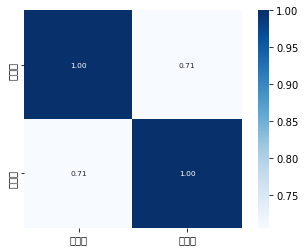

In [116]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 7.5}, fmt = '.2f', square = True, cmap = 'Blues')

### ourworldindata

In [ ]:
from IPython.display import display, Image
import os, warnings
import re

warnings.filterwarnings(action='ignore')
